<a href="https://colab.research.google.com/github/neeraj2k2/irisflowerclassification/blob/main/irisflowerclassification_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hi, I am Neeraj Keerthi. Currently working as an intern at letsgrowmore.
This is my first task - Iris Flower Classification**




---


**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


**linking dataset as a variable**

In [ ]:
link = 'https://raw.githubusercontent.com/neeraj2k2/irisflowerclassification/main/iris.csv'

In [ ]:
print(link)

https://raw.githubusercontent.com/neeraj2k2/irisflowerclassification/main/iris.csv


In [ ]:
col_names = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']

In [ ]:
irisdata = pd.read_csv(link, names = col_names)

In [ ]:
irisdata.shape

(150, 5)

In [ ]:
irisdata.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
irisdata.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
irisdata['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

**Plotting data to identify trend**

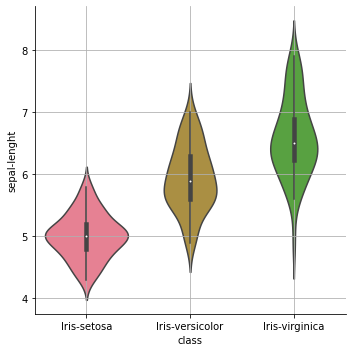

In [ ]:
sns.catplot(data=irisdata, x="class", y="sepal-lenght", kind="violin")
plt.grid()

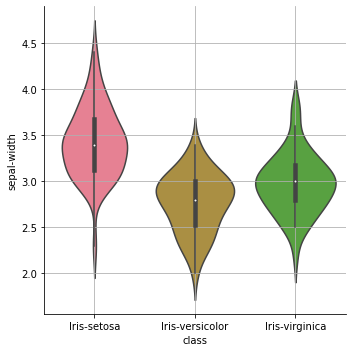

In [ ]:
sns.catplot(data=irisdata, x="class", y="sepal-width", kind="violin")
plt.grid()

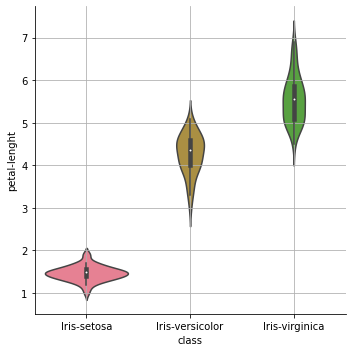

In [ ]:
sns.catplot(data=irisdata, x="class", y="petal-lenght", kind="violin")
plt.grid()

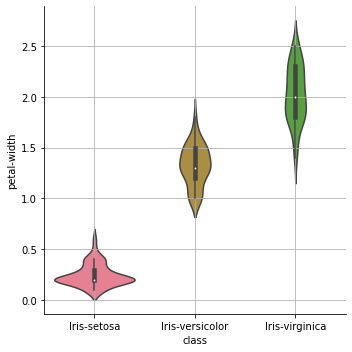

In [ ]:
sns.catplot(data=irisdata, x="class", y="petal-width", kind="violin")
plt.grid()

**Trying machine learning models**

In [ ]:
x = irisdata.drop(['class'], axis=1)
y = irisdata['class']
print(f'x shape: {x.shape} | y shape: {y.shape} ')

x shape: (150, 4) | y shape: (150,) 


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('SVC', SVC(gamma='auto')))
models.append(('KNeighbours', KNeighborsClassifier()))
models.append(('LinearDiscriminant', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVC: 0.983333 (0.033333)
KNeighbours: 0.958333 (0.041667)
LinearDiscriminant: 0.975000 (0.038188)
NB: 0.950000 (0.055277)


**Using Support Vector Machine**

In [ ]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [ ]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

